# Get the Data 

In [1]:
import pandas as pd 
data = pd.read_csv("../data/data_3_range.csv", header=None, names=["secenek", "cinsiyet", "sidmalzememarka", "UrunGrubu", "ResimAdresi", "YakaTipi", 
                                                            "CepOzelligi", "KolBoyuAciklama", "resimSira"])
data.head() 

,secenek,cinsiyet,sidmalzememarka,UrunGrubu,ResimAdresi,YakaTipi,CepOzelligi,KolBoyuAciklama,resimSira
1,G021GL004.000.1011642.VR003,1,1,0GK,https://resim.aydinli.com.tr/02/1/004/S5022134...,DÜĞMELI YAKA,TEK CEP,KISA KOL,3
2,G021GL004.000.1011642.VR003,1,1,0GK,https://resim.aydinli.com.tr/02/1/004/S5022134...,DÜĞMELI YAKA,TEK CEP,KISA KOL,1
3,G021GL004.000.1011642.VR003,1,1,0GK,https://resim.aydinli.com.tr/02/1/004/S5022134...,DÜĞMELI YAKA,TEK CEP,KISA KOL,2
4,G021GL004.000.1011907.VR036,1,1,0GU,https://resim.aydinli.com.tr/02/1/004/S5022152...,DÜĞMELI YAKA,CEPSIZ,UZUN KOL,1
5,G021GL004.000.1012040.VR003,1,1,0GU,https://resim.aydinli.com.tr/02/1/004/S5022136...,DÜĞMELI YAKA,CEPSIZ,UZUN KOL,1


In [2]:
data_img = data[["secenek","ResimAdresi", "YakaTipi", "CepOzelligi", "KolBoyuAciklama"]]
data_img.head() 

,secenek,ResimAdresi,YakaTipi,CepOzelligi,KolBoyuAciklama
1,G021GL004.000.1011642.VR003,https://resim.aydinli.com.tr/02/1/004/S5022134...,DÜĞMELI YAKA,TEK CEP,KISA KOL
2,G021GL004.000.1011642.VR003,https://resim.aydinli.com.tr/02/1/004/S5022134...,DÜĞMELI YAKA,TEK CEP,KISA KOL
3,G021GL004.000.1011642.VR003,https://resim.aydinli.com.tr/02/1/004/S5022134...,DÜĞMELI YAKA,TEK CEP,KISA KOL
4,G021GL004.000.1011907.VR036,https://resim.aydinli.com.tr/02/1/004/S5022152...,DÜĞMELI YAKA,CEPSIZ,UZUN KOL
5,G021GL004.000.1012040.VR003,https://resim.aydinli.com.tr/02/1/004/S5022136...,DÜĞMELI YAKA,CEPSIZ,UZUN KOL


In [3]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    data_img.iloc[:, :2],
    data_img.iloc[:, 2:],
    test_size=0.25, 
    random_state=42
)

X_train.shape, X_test.shape 

((3390, 2), (1131, 2))

In [4]:
y_train["YakaTipi"].value_counts() 

DÜĞMELI YAKA     1598
BISIKLET YAKA     782
KAPIŞONLU         524
POLO YAKA         486
Name: YakaTipi, dtype: int64

In [5]:
y_train["CepOzelligi"].value_counts() 

CEPSIZ         2495
TEK CEP         325
ÇIFT CEP        289
KANGURU CEP     281
Name: CepOzelligi, dtype: int64

In [6]:
y_train["KolBoyuAciklama"].value_counts() 

UZUN KOL    2622
KISA KOL     768
Name: KolBoyuAciklama, dtype: int64

# Download Data 

In [9]:
import cv2 
import os 
import requests 
import numpy as np 

def save_image_cv(url, scale_percent, path, size = None):
    resp = requests.get(url, stream=True).raw 
    
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    if image is None: 
        raise TypeError("None type") 
    
    if size == None: 
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        dsize = (width, height)
    else: 
        dsize = size 
    
    output = cv2.resize(image, dsize)

    return cv2.imwrite(path, output)


def make_dataset_cv(dataset_name, datasource, iteration = None, set_name="train"):
    problems_rows = []
    iterator = 0 
    try:
        base = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), '.'))
        path = os.path.join('data', dataset_name)
        path = os.path.join(base, path)
        if not os.path.isdir(path):
            os.mkdir(path)
        
        # ../data/dataset_name/
        
        folder_set = os.path.join(path, set_name) 
        os.mkdir(folder_set) 
    
        for img_index, img_row in datasource.iterrows():
                try:
                    # tmp = os.path.join(path, img_row["partition"])
                    # data / dataset / train - test / 
                    #tmp = os.path.join(folder_set, "class_" + str(img_row["class"])) 
                    #if not os.path.isdir(tmp): 
                        #os.mkdir(tmp) 
                    
                    if save_image_cv(img_row['ResimAdresi'], 75, os.path.join(folder_set, str(img_index) + '.png'), size=(224, 224)) == False:
                        problems_rows.append(img_row)

                    if iteration is not None and iterator == iteration:
                        break
                    else:
                        iterator+=1
                        if iterator % 1000 == 0: 
                            print(f"Iteration {iterator}") 
                            
                except Exception as e2:
                    problems_rows.append(img_row)
                    print(e2)
                    continue
    except Exception as e:
        print('An exception occurred.', e)
    return problems_rows

In [10]:
errors = make_dataset_cv(
    dataset_name = "range_3_images_AYD", 
    datasource = X_train
)

Iteration 1000
Iteration 2000
Iteration 3000


In [12]:
errors

[]

In [13]:
errors_test = make_dataset_cv(
    dataset_name = "range_3_images_AYD", 
    datasource = X_test,
    set_name="test"
) 

None type
None type
None type
Iteration 1000


In [14]:
errors_test

[secenek                               G021GL004.000.989158.VR013
 ResimAdresi    https://resim.aydinli.com.tr/So/t/are/est\02\1...
 Name: 945, dtype: object,
 secenek                               G021GL004.000.861939.VR046
 ResimAdresi    https://resim.aydinli.com.tr/So/t/are/est\02\1...
 Name: 745, dtype: object,
 secenek                               G021GL004.000.974800.VR033
 ResimAdresi    https://resim.aydinli.com.tr/So/t/are/est\02\1...
 Name: 898, dtype: object]

In [18]:
X_test[X_test.index == 945]

,secenek,ResimAdresi


In [17]:
y_test[y_test.index ==945]

,YakaTipi,CepOzelligi,KolBoyuAciklama


In [16]:
X_test[X_test.index == 745]

,secenek,ResimAdresi


In [15]:
X_test.drop(index=[898, 745, 945], inplace=True) 
y_test.drop(index=[898, 745, 945], inplace=True) 

In [19]:
X_train.shape, y_train.shape 

((3390, 2), (3390, 3))

In [20]:
X_test.shape, y_test.shape 

((1128, 2), (1128, 3))

In [27]:
import os 
X_train["paths"] = X_train.index.copy() 
X_train["paths"] = X_train["paths"].apply(lambda x: os.path.join("../data/range_3_images_AYD/train/",str(x) + '.png')) 

X_test["paths"] = X_test.index.copy() 
X_test["paths"] = X_test["paths"].apply(lambda x: os.path.join("../data/range_3_images_AYD/test/",str(x) + '.png')) 

In [28]:
X_test.head() 

,secenek,ResimAdresi,paths
2399,G081SZ004.000.744736.VR033,https://resim.aydinli.com.tr/08/1/004/S5019939...,../data/range_3_images_AYD/test/2399.png
801,G021GL004.000.880117.VR033,https://resim.aydinli.com.tr/02/1/004/S5021118...,../data/range_3_images_AYD/test/801.png
2289,G081GL082.000.851615.VR046,https://resim.aydinli.com.tr/08/1/082/S5020865...,../data/range_3_images_AYD/test/2289.png
2345,G081SZ004.000.1098327.VR006,https://resim.aydinli.com.tr/08/1/004/S5022635...,../data/range_3_images_AYD/test/2345.png
3616,G082SZ011.000.734024.VR054,https://resim.aydinli.com.tr/08/2/011/S5020268...,../data/range_3_images_AYD/test/3616.png


In [29]:
X_train.head() 

,secenek,ResimAdresi,paths
1413,G021SZ004.000.1487525.VR054,https://showroom.aydinli.com.tr/2022K/02/50259...,../data/range_3_images_AYD/train/1413.png
2118,G081GL082.000.1082611.VR014,https://resim.aydinli.com.tr/08/1/082/S5022533...,../data/range_3_images_AYD/train/2118.png
3444,G081SZ082.000.944127.VR177,https://resim.aydinli.com.tr/08/1/082/S5021628...,../data/range_3_images_AYD/train/3444.png
1489,G021SZ004.000.837114.VR033,https://resim.aydinli.com.tr/02/1/004/S5020711...,../data/range_3_images_AYD/train/1489.png
2621,G081SZ011.000.1455103.VR043,https://resim.aydinli.com.tr/08/1/011/S5025321...,../data/range_3_images_AYD/train/2621.png


In [30]:
train_data_flow_df = pd.concat([
    X_train.paths, 
    pd.Series(y_train.values.tolist(), index=y_train.index, name="labels")
], axis=1)

test_data_flow_df = pd.concat([
    X_test.paths, 
    pd.Series(y_test.values.tolist(), index=y_test.index, name="labels") 
], axis=1)

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()

In [32]:
train = train_gen.flow_from_dataframe(
    dataframe=train_data_flow_df, 
    directory="", 
    x_col="paths", 
    y_col="labels", 
    seed=42, 
    class_mode='categorical', 
    target_size=(224, 224))

test = test_gen.flow_from_dataframe(
    dataframe=test_data_flow_df, 
    directory="", 
    x_col="paths", 
    y_col="labels", 
    seed=42, 
    class_mode='categorical', 
    target_size=(224, 224))

Found 3390 validated image filenames belonging to 10 classes.
Found 1128 validated image filenames belonging to 10 classes.


# Model 0: Efficient Net B0 

In [33]:
import tensorflow as tf 

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False 

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs) 
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x) 

initializer = tf.keras.initializers.GlorotUniform(seed=42) 
activation = tf.keras.activations.sigmoid  

outputs = tf.keras.layers.Dense(10, kernel_initializer=initializer,activation=activation, name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs) 

In [34]:
model_0.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[
                    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                    tf.keras.metrics.Precision(name='precision'),
                    tf.keras.metrics.Recall(name='recall')
                ]) 

In [35]:
checkpoint_path = "./checkpoints/range3/MODEL_0/checkpoint-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1) 

In [36]:
model_0.summary() 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [37]:
history_model_0 = model_0.fit(
    train, 
    epochs=10, 
    steps_per_epoch=len(train), 
    validation_data = test,
    callbacks=[checkpoint_callback],
    validation_steps=len(test)
)

Epoch 1/10
106/106 [==============================] - ETA: 0s - loss: 0.3813 - accuracy: 0.8383 - precision: 0.7648 - recall: 0.6658
Epoch 1: saving model to ./checkpoints/range3/MODEL_0\checkpoint-1.ckpt
106/106 [==============================] - 374s 3s/step - loss: 0.3813 - accuracy: 0.8383 - precision: 0.7648 - recall: 0.6658 - val_loss: 0.2853 - val_accuracy: 0.8855 - val_precision: 0.8421 - val_recall: 0.7612
Epoch 2/10
106/106 [==============================] - ETA: 0s - loss: 0.2681 - accuracy: 0.8920 - precision: 0.8534 - recall: 0.7729
Epoch 2: saving model to ./checkpoints/range3/MODEL_0\checkpoint-2.ckpt
106/106 [==============================] - 345s 3s/step - loss: 0.2681 - accuracy: 0.8920 - precision: 0.8534 - recall: 0.7729 - val_loss: 0.2378 - val_accuracy: 0.9056 - val_precision: 0.8720 - val_recall: 0.8032
Epoch 3/10
106/106 [==============================] - ETA: 0s - loss: 0.2311 - accuracy: 0.9098 - precision: 0.8789 - recall: 0.8110
Epoch 3: saving model to ./ch

<AxesSubplot:>

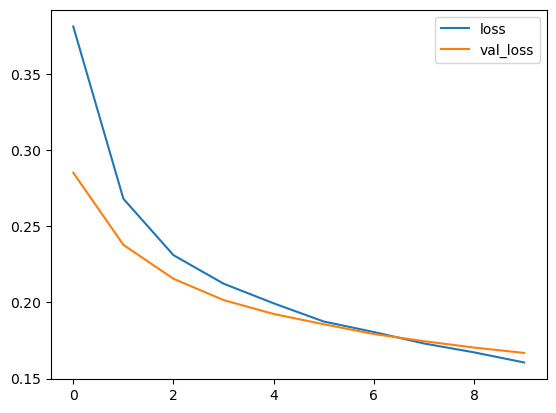

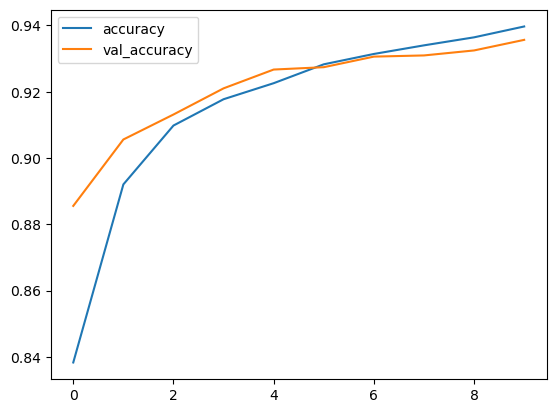

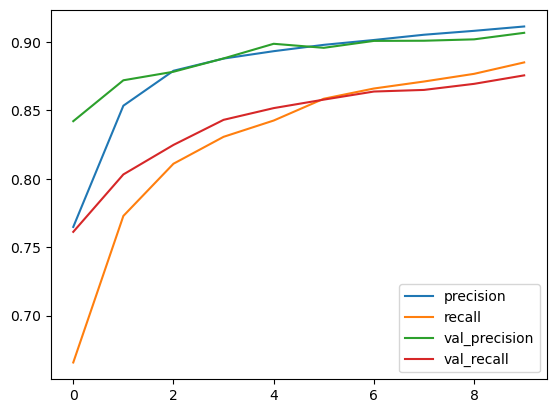

In [50]:
pd.DataFrame(history_model_0.history)[["loss", "val_loss"]].plot()

pd.DataFrame(history_model_0.history)[["accuracy", "val_accuracy"]].plot()

pd.DataFrame(history_model_0.history)[["precision", "recall", "val_precision", "val_recall"]].plot()

## Fine Tuning 

In [51]:
for layer in model_0.layers: 
  print(layer.trainable)

True
True
True
True


In [40]:
len(base_model.trainable_variables)

0

In [52]:
base_model.trainable = True 

for layer in base_model.layers[:-10]:
  layer.trainable = False 

model_0.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[
                    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                    tf.keras.metrics.Precision(name='precision'),
                    tf.keras.metrics.Recall(name='recall')
                ]) 


In [42]:
# Fine tune for another 5 epochs
fine_tune_epochs = 10 + 5

# Refit the model (same as model_2 except with more trainable layers)
history_model_0_fine = model_0.fit(train,
                                  epochs=fine_tune_epochs,
                                  validation_data=test,
                                  initial_epoch=history_model_0.epoch[-1], # start from previous last epoch
                                  validation_steps=len(test),
                                  callbacks=[checkpoint_callback]
                                  )

Epoch 10/15
106/106 [==============================] - ETA: 0s - loss: 0.1687 - accuracy: 0.9330 - precision: 0.8942 - recall: 0.8808
Epoch 10: saving model to ./checkpoints/range3/MODEL_0\checkpoint-10.ckpt
106/106 [==============================] - 405s 4s/step - loss: 0.1687 - accuracy: 0.9330 - precision: 0.8942 - recall: 0.8808 - val_loss: 0.1286 - val_accuracy: 0.9484 - val_precision: 0.9220 - val_recall: 0.9046
Epoch 11/15
106/106 [==============================] - ETA: 0s - loss: 0.1061 - accuracy: 0.9609 - precision: 0.9388 - recall: 0.9305
Epoch 11: saving model to ./checkpoints/range3/MODEL_0\checkpoint-11.ckpt
106/106 [==============================] - 402s 4s/step - loss: 0.1061 - accuracy: 0.9609 - precision: 0.9388 - recall: 0.9305 - val_loss: 0.1307 - val_accuracy: 0.9488 - val_precision: 0.9201 - val_recall: 0.9084
Epoch 12/15
106/106 [==============================] - ETA: 0s - loss: 0.0838 - accuracy: 0.9695 - precision: 0.9527 - recall: 0.9453
Epoch 12: saving model

In [43]:
import matplotlib.pyplot as plt 

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

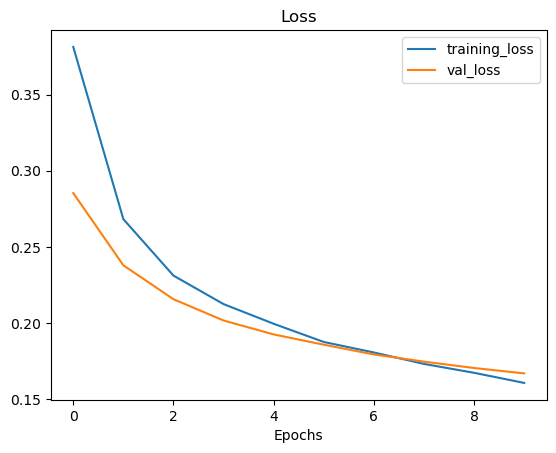

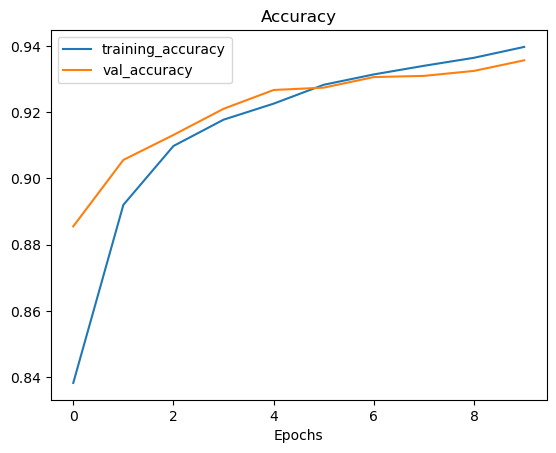

In [44]:
plot_loss_curves(history_model_0)

In [45]:
def compare_historys(original_history, new_history, initial_epochs=10):
    """
    Compares two TensorFlow model History objects.
    
    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here) 
    """ 
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

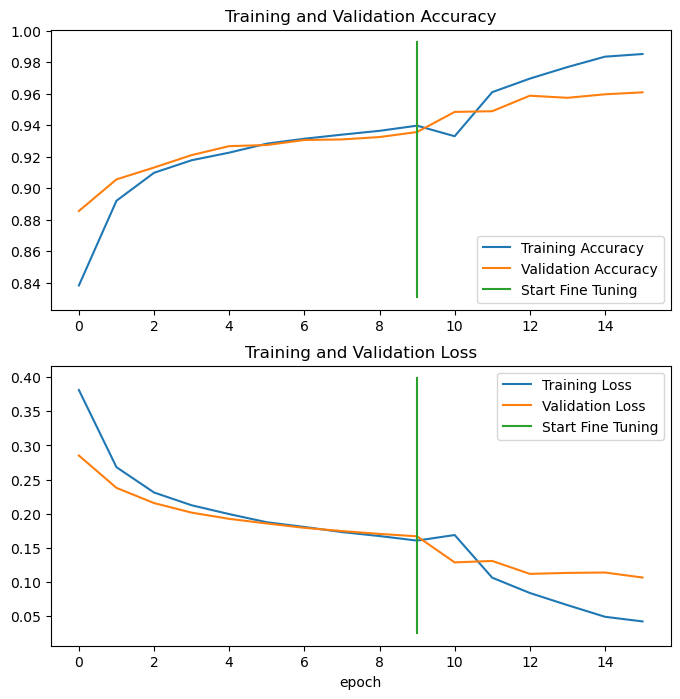

In [46]:
compare_historys(history_model_0, history_model_0_fine, initial_epochs=10)

<AxesSubplot:>

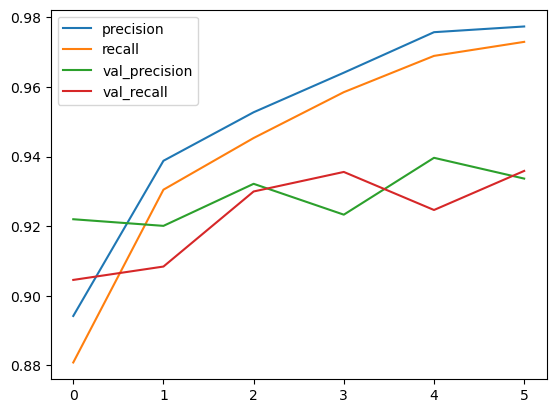

In [53]:
pd.DataFrame(history_model_0_fine.history)[["precision", "recall", "val_precision", "val_recall"]].plot()

In [48]:
pd.DataFrame(history_model_0_fine.history)[["precision", "recall", "val_precision", "val_recall"]]

,precision,recall,val_precision,val_recall
0,0.894190,0.880826,0.921988,0.904551
1,0.938790,0.930482,0.920084,0.908392
2,0.952730,0.945329,0.932168,0.929965
3,0.964099,0.958505,0.923301,0.935579
4,0.975740,0.968928,0.939640,0.924645
5,0.977380,0.972960,0.933667,0.935875


In [49]:
pd.DataFrame(history_model_0.history)[["precision", "recall", "val_precision", "val_recall"]]

,precision,recall,val_precision,val_recall
0,0.764825,0.665782,0.842105,0.761229
1,0.853420,0.772861,0.871992,0.803191
2,0.878943,0.811013,0.878225,0.824764
3,0.887861,0.830678,0.887955,0.843085
4,0.893255,0.842576,0.898659,0.851655
5,0.897882,0.858505,0.895711,0.857861
6,0.901433,0.865978,0.900770,0.863771
7,0.905273,0.871091,0.900893,0.864953
8,0.908128,0.876696,0.901901,0.869385
9,0.911309,0.885054,0.906671,0.875591


In [54]:
model_0.load_weights("./checkpoints/range3/MODEL_0/checkpoint-12.ckpt") # ckpt 12 load buradayız

In [55]:
model_0.evaluate(
    test
)

# 14s 642ms/step - loss: 0.1032 - accuracy: 0.9609 - precision: 0.9292 - recall: 0.9415

36/36 [==============================] - 70s 2s/step - loss: 0.1118 - accuracy: 0.9587 - precision: 0.9322 - recall: 0.9300


[0.1117708832025528, 0.958687961101532, 0.9321682453155518, 0.929964542388916]

In [56]:
model_0.save('../trained_models/efficient_net_model_range3_EPOCH-12.h5')
# model couldn't save ! 

## Prediction 

In [57]:
input_first = test[0][0][0] 
output_first = test[0][1][0]

In [58]:
import cv2 
input_first = cv2.resize(input_first,(224,224))     # resize image to match model's expected sizing
input_first = input_first.reshape(1,224,224,3)

In [59]:
results = model_0.predict(
    input_first
)

1/1 [==============================] - 3s 3s/step


In [60]:
results[results >= 0.5] = 1 
results[results < 0.5] = 0 

In [61]:
results

array([[0., 1., 1., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [62]:
output_first

array([0., 1., 1., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

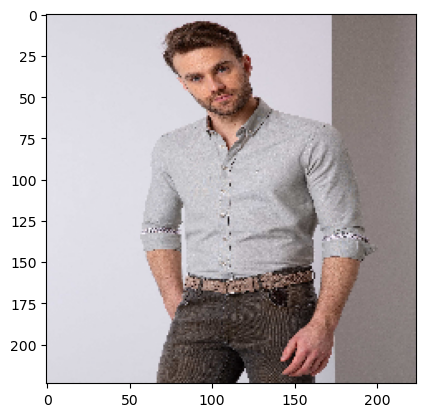

In [63]:
from matplotlib import pyplot as plt 

plt.imshow(test[0][0][0] / 255.0)

In [64]:
classes = test.class_indices 
classes

{'BISIKLET YAKA': 0,
 'CEPSIZ': 1,
 'DÜĞMELI YAKA': 2,
 'KANGURU CEP': 3,
 'KAPIŞONLU': 4,
 'KISA KOL': 5,
 'POLO YAKA': 6,
 'TEK CEP': 7,
 'UZUN KOL': 8,
 'ÇIFT CEP': 9}

In [65]:
import cv2
from matplotlib import pyplot as plt 


def predict_custom(img_input_array, img_labels, model=model_0, threshold=0.5, classes=classes):
    input_x = cv2.resize(img_input_array,(224,224))     # resize image to match model's expected sizing
    input_x = input_x.reshape(1,224,224,3) 

    results = model_0.predict(input_x) 
    results[results >= threshold] = 1 
    results[results < threshold] = 0

    results = pd.DataFrame(
        index=classes.keys(), 
        data=np.column_stack((results.reshape((10,1)), img_labels.reshape((10,1)))),
        columns=["preds", "actuals"] 
    )

    plt.imshow(img_input_array / 255.0)
    plt.show()

    return results   

1/1 [==============================] - 0s 395ms/step


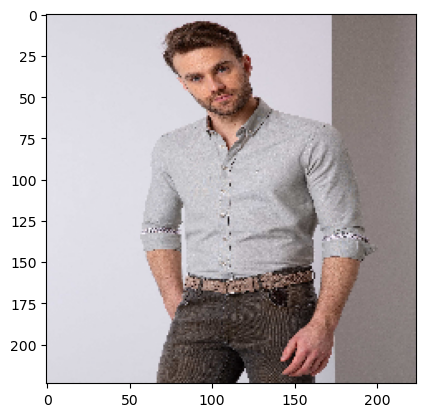

,preds,actuals
BISIKLET YAKA,0.0,0.0
CEPSIZ,1.0,1.0
DÜĞMELI YAKA,1.0,1.0
KANGURU CEP,0.0,0.0
KAPIŞONLU,0.0,0.0
KISA KOL,0.0,0.0
POLO YAKA,0.0,0.0
TEK CEP,0.0,0.0
UZUN KOL,1.0,1.0
ÇIFT CEP,0.0,0.0


In [66]:
predict_custom(
    test[0][0][0], 
    test[0][1][0]
)

1/1 [==============================] - 0s 55ms/step


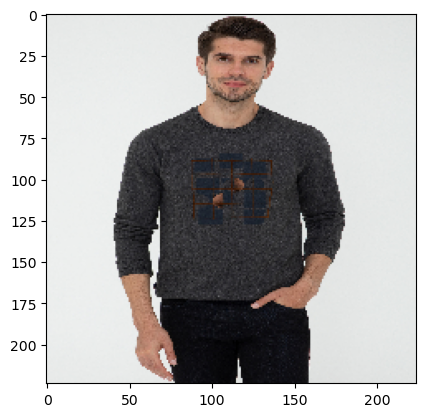

,preds,actuals
BISIKLET YAKA,1.0,1.0
CEPSIZ,1.0,1.0
DÜĞMELI YAKA,0.0,0.0
KANGURU CEP,0.0,0.0
KAPIŞONLU,0.0,0.0
KISA KOL,0.0,0.0
POLO YAKA,0.0,0.0
TEK CEP,0.0,0.0
UZUN KOL,1.0,1.0
ÇIFT CEP,0.0,0.0


In [119]:
predict_custom(
    test[0][0][20], 
    test[0][1][20]
)

1/1 [==============================] - 2s 2s/step


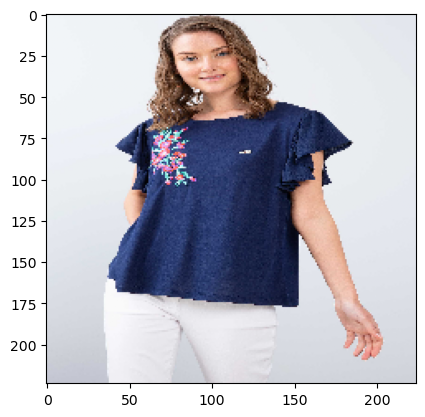

,preds,actuals
BISIKLET YAKA,1.0,1.0
CEPSIZ,1.0,1.0
DÜĞMELI YAKA,0.0,0.0
KANGURU CEP,0.0,0.0
KAPIŞONLU,0.0,0.0
KISA KOL,1.0,1.0
POLO YAKA,0.0,0.0
TEK CEP,0.0,0.0
UZUN KOL,0.0,0.0
ÇIFT CEP,0.0,0.0


In [67]:
predict_custom(
    test[10][0][30], 
    test[10][1][30]
)

# Model 1: VGG-16 

In [68]:
vgg_16 = tf.keras.applications.VGG16(weights="imagenet",input_shape=(224, 224, 3), include_top=False) 
vgg_16.trainable = False 

In [69]:
inputs = tf.keras.layers.Input(shape=(224,224,3)) 
x = tf.cast(inputs, tf.float32) 
x = tf.keras.applications.vgg16.preprocess_input(x)
x = vgg_16(x) 
x = tf.keras.layers.GlobalAveragePooling2D()(x) 

initializer = tf.keras.initializers.GlorotUniform(seed=42) 
activation = tf.keras.activations.sigmoid 

outputs = tf.keras.layers.Dense(10,
                             kernel_initializer=initializer, 
                             activation=activation)(x) 

model_1 = tf.keras.Model(inputs, outputs) 

In [70]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(), # default from_logits=False
              metrics=[
                tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')])

In [71]:
checkpoint_path = "./checkpoints/range3/MODEL_1/checkpoint-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1) 

In [72]:
history_model_1 = model_1.fit(train, 
                            epochs=10,
                            steps_per_epoch=len(train), 
                            validation_data =test,
                            validation_steps=len(test),
                            callbacks=[checkpoint_callback]
                            )

Epoch 1/10
106/106 [==============================] - ETA: 0s - loss: 0.7647 - accuracy: 0.7732 - precision: 0.6308 - recall: 0.5879
Epoch 1: saving model to ./checkpoints/range3/MODEL_1\checkpoint-1.ckpt
106/106 [==============================] - 477s 4s/step - loss: 0.7647 - accuracy: 0.7732 - precision: 0.6308 - recall: 0.5879 - val_loss: 0.4762 - val_accuracy: 0.8263 - val_precision: 0.7244 - val_recall: 0.6797
Epoch 2/10
106/106 [==============================] - ETA: 0s - loss: 0.3912 - accuracy: 0.8480 - precision: 0.7626 - recall: 0.7164
Epoch 2: saving model to ./checkpoints/range3/MODEL_1\checkpoint-2.ckpt
106/106 [==============================] - 476s 4s/step - loss: 0.3912 - accuracy: 0.8480 - precision: 0.7626 - recall: 0.7164 - val_loss: 0.3469 - val_accuracy: 0.8674 - val_precision: 0.7869 - val_recall: 0.7651
Epoch 3/10
106/106 [==============================] - ETA: 0s - loss: 0.2986 - accuracy: 0.8809 - precision: 0.8196 - recall: 0.7734
Epoch 3: saving model to ./ch

<AxesSubplot:>

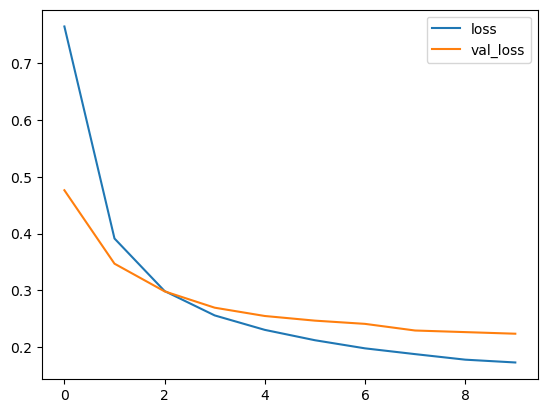

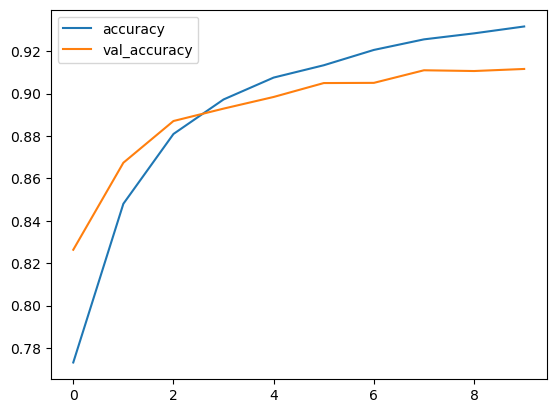

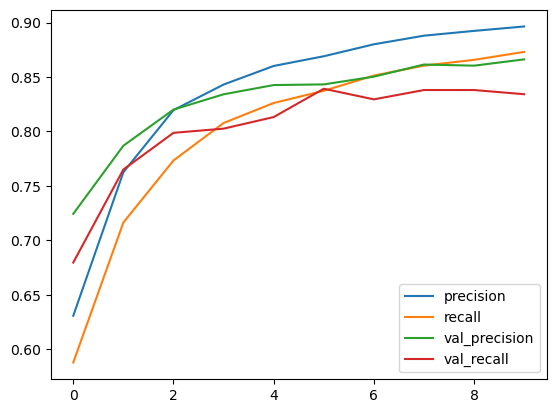

In [79]:
pd.DataFrame(history_model_1.history)[["loss", "val_loss"]].plot()

pd.DataFrame(history_model_1.history)[["accuracy", "val_accuracy"]].plot()

pd.DataFrame(history_model_1.history)[["precision", "recall", "val_precision", "val_recall"]].plot()

## Fine Tune 

In [80]:
len(vgg_16.layers)

19

In [82]:
vgg_16.trainable = True 

for layer in vgg_16.layers[:-10]:
  layer.trainable = False 

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[
                    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                    tf.keras.metrics.Precision(name='precision'),
                    tf.keras.metrics.Recall(name='recall')
                ]) 


In [83]:
# Fine tune for another 5 epochs
fine_tune_epochs = 10 + 5

# Refit the model (same as model_2 except with more trainable layers)
history_model_1_fine = model_0.fit(train,
                                  epochs=fine_tune_epochs,
                                  validation_data=test,
                                  initial_epoch=history_model_1.epoch[-1], # start from previous last epoch
                                  validation_steps=len(test),
                                  callbacks=[checkpoint_callback]
                                  )

Epoch 10/15
106/106 [==============================] - ETA: 0s - loss: 0.0631 - accuracy: 0.9787 - precision: 0.9670 - recall: 0.9618
Epoch 10: saving model to ./checkpoints/range3/MODEL_2\checkpoint-10.ckpt
106/106 [==============================] - 413s 4s/step - loss: 0.0631 - accuracy: 0.9787 - precision: 0.9670 - recall: 0.9618 - val_loss: 0.1078 - val_accuracy: 0.9581 - val_precision: 0.9375 - val_recall: 0.9217
Epoch 11/15
106/106 [==============================] - ETA: 0s - loss: 0.0540 - accuracy: 0.9809 - precision: 0.9712 - recall: 0.9648
Epoch 11: saving model to ./checkpoints/range3/MODEL_2\checkpoint-11.ckpt
106/106 [==============================] - 412s 4s/step - loss: 0.0540 - accuracy: 0.9809 - precision: 0.9712 - recall: 0.9648 - val_loss: 0.1169 - val_accuracy: 0.9591 - val_precision: 0.9385 - val_recall: 0.9243
Epoch 12/15
106/106 [==============================] - ETA: 0s - loss: 0.0400 - accuracy: 0.9873 - precision: 0.9806 - recall: 0.9769
Epoch 12: saving model

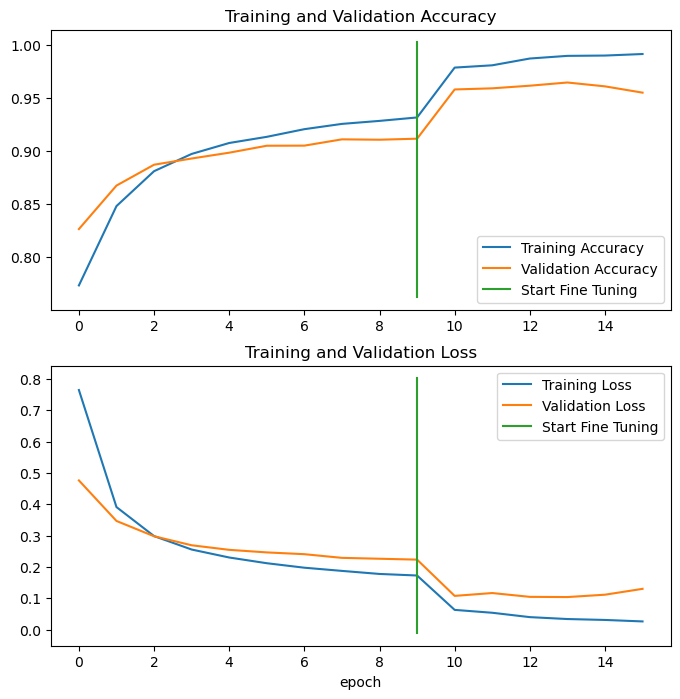

In [84]:
compare_historys(
   history_model_1,
   history_model_1_fine
)

<AxesSubplot:>

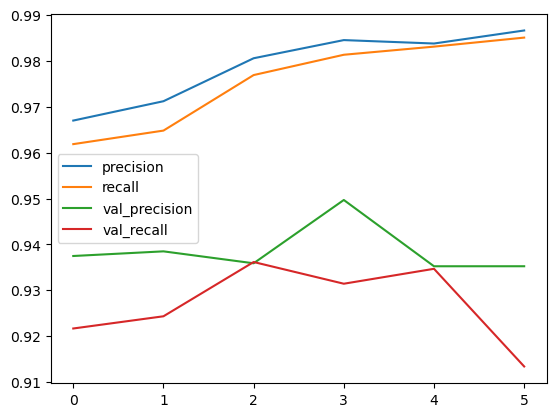

In [85]:
pd.DataFrame(history_model_1_fine.history)[["precision", "recall", "val_precision", "val_recall"]].plot()

In [86]:
pd.DataFrame(history_model_1.history)[["precision", "recall", "val_precision", "val_recall"]]

,precision,recall,val_precision,val_recall
0,0.630829,0.587906,0.724409,0.679669
1,0.762613,0.716421,0.786930,0.765071
2,0.819612,0.773353,0.820085,0.798759
3,0.843083,0.807768,0.834152,0.802600
4,0.860156,0.826155,0.842621,0.813239
5,0.869068,0.837365,0.843230,0.839243
6,0.880057,0.851327,0.850348,0.829492
7,0.887976,0.860472,0.861482,0.838061
8,0.892368,0.865782,0.860437,0.838061
9,0.896416,0.873058,0.866217,0.834220


In [87]:
pd.DataFrame(history_model_1_fine.history)[["precision", "recall", "val_precision", "val_recall"]]

,precision,recall,val_precision,val_recall
0,0.966983,0.961849,0.937481,0.921690
1,0.971197,0.964798,0.938494,0.924350
2,0.980557,0.976893,0.935894,0.936170
3,0.984512,0.981318,0.949684,0.931442
4,0.983765,0.983088,0.935245,0.934693
5,0.986606,0.985054,0.935250,0.913416


## Model 1.1: VGG-16 with Data Augmentation 

In [73]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1), 
    tf.keras.layers.RandomBrightness(0.1)
])

In [113]:
vgg_16_v2 = tf.keras.applications.VGG16(weights="imagenet", input_shape=(224,224, 3), include_top=False) 
vgg_16_v2.trainable = False 

inputs = tf.keras.layers.Input(shape=(224, 224, 3)) 
x = tf.cast(inputs, tf.float32) 
# x = data_augmentation(x)
x = tf.keras.applications.vgg16.preprocess_input(x) 
x = vgg_16_v2(x) 
x = tf.keras.layers.GlobalAveragePooling2D()(x) 

initializer = tf.keras.initializers.GlorotUniform(seed=42) 
activation = tf.keras.activations.sigmoid 

outputs = tf.keras.layers.Dense(10,
                             kernel_initializer=initializer, 
                             activation=activation)(x) 

model_1_1 = tf.keras.Model(inputs, outputs) 

In [114]:
model_1_1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(), # default from_logits=False
              metrics=[
                tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')])

In [115]:
checkpoint_path = "./checkpoints/range3/MODEL_1_1/checkpoint-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1) 

In [116]:
history_model_1_1 = model_1_1.fit(train, 
                            epochs=30,
                            steps_per_epoch=len(train), 
                            validation_data =test,
                            validation_steps=len(test),
                            callbacks=[checkpoint_callback]
                            )

Epoch 1/30
106/106 [==============================] - ETA: 0s - loss: 0.7609 - accuracy: 0.7648 - precision: 0.6103 - recall: 0.5973
Epoch 1: saving model to ./checkpoints/range3/MODEL_1_1\checkpoint-1.ckpt
106/106 [==============================] - 487s 5s/step - loss: 0.7609 - accuracy: 0.7648 - precision: 0.6103 - recall: 0.5973 - val_loss: 0.4769 - val_accuracy: 0.8203 - val_precision: 0.7160 - val_recall: 0.6646
Epoch 2/30
106/106 [==============================] - ETA: 0s - loss: 0.3925 - accuracy: 0.8474 - precision: 0.7613 - recall: 0.7159
Epoch 2: saving model to ./checkpoints/range3/MODEL_1_1\checkpoint-2.ckpt
106/106 [==============================] - 490s 5s/step - loss: 0.3925 - accuracy: 0.8474 - precision: 0.7613 - recall: 0.7159 - val_loss: 0.3513 - val_accuracy: 0.8662 - val_precision: 0.7973 - val_recall: 0.7429
Epoch 3/30
106/106 [==============================] - ETA: 0s - loss: 0.3050 - accuracy: 0.8783 - precision: 0.8143 - recall: 0.7699
Epoch 3: saving model to 

In [117]:
vgg_16_v2.trainable =  True 

for layer in vgg_16_v2.layers[:-10]:
  layer.trainable = False 

model_1_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[
                    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                    tf.keras.metrics.Precision(name='precision'),
                    tf.keras.metrics.Recall(name='recall')
                ]) 

# Fine tune for another 5 epochs
fine_tune_epochs = 30 + 20

# Refit the model (same as model_2 except with more trainable layers)
history_model_1_1_fine = model_1_1.fit(train,
                                  epochs=fine_tune_epochs,
                                  validation_data=test,
                                  initial_epoch=history_model_1_1.epoch[-1], # start from previous last epoch
                                  validation_steps=len(test),
                                  callbacks=[checkpoint_callback]
                                  )

Epoch 30/50
106/106 [==============================] - ETA: 0s - loss: 8.1174 - accuracy: 0.6378 - precision: 0.4199 - recall: 0.5440
Epoch 30: saving model to ./checkpoints/range3/MODEL_1_1\checkpoint-30.ckpt
106/106 [==============================] - 1105s 10s/step - loss: 8.1174 - accuracy: 0.6378 - precision: 0.4199 - recall: 0.5440 - val_loss: 0.6187 - val_accuracy: 0.6351 - val_precision: 0.4189 - val_recall: 0.5585
Epoch 31/50
106/106 [==============================] - ETA: 0s - loss: 0.6083 - accuracy: 0.6345 - precision: 0.4174 - recall: 0.5513
Epoch 31: saving model to ./checkpoints/range3/MODEL_1_1\checkpoint-31.ckpt
106/106 [==============================] - 1122s 11s/step - loss: 0.6083 - accuracy: 0.6345 - precision: 0.4174 - recall: 0.5513 - val_loss: 0.5853 - val_accuracy: 0.6355 - val_precision: 0.4193 - val_recall: 0.5585
Epoch 32/50
106/106 [==============================] - ETA: 0s - loss: 0.5708 - accuracy: 0.6376 - precision: 0.4195 - recall: 0.5415
Epoch 32: savi

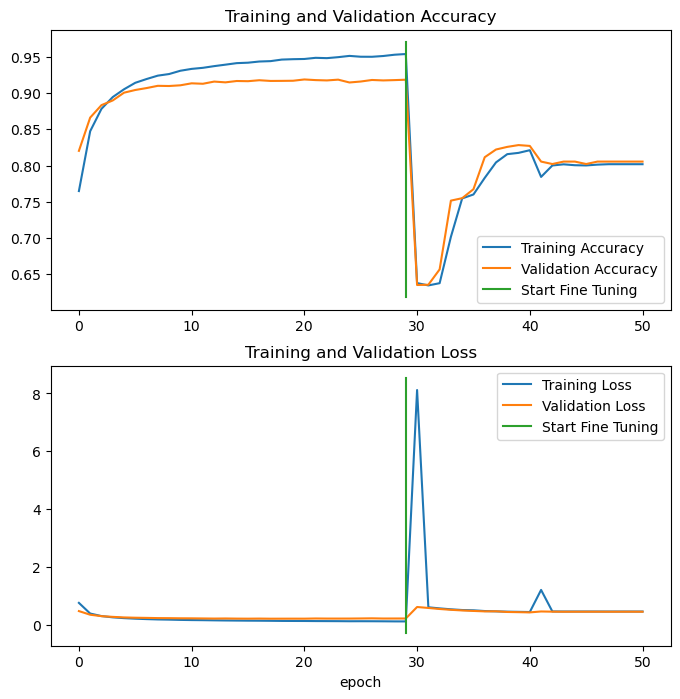

In [118]:
compare_historys(history_model_1_1, history_model_1_1_fine, initial_epochs=30)

# Model 2: MobileNetV2 

In [74]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')
mobile_net.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [75]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x = mobile_net(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(10,
                             activation=tf.keras.activations.sigmoid)(x)
model_2 = tf.keras.Model(inputs, outputs)

In [76]:
base_learning_rate = 0.0001
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[
                tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')])

In [77]:
checkpoint_path = "./checkpoints/range3/MODEL_2/checkpoint-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1) 

In [78]:
history_model_2 = model_2.fit(train, 
                            epochs=10,
                            steps_per_epoch=len(train), 
                            validation_data =test,
                            validation_steps=len(test),
                            callbacks=[checkpoint_callback]
                            )

Epoch 1/10
106/106 [==============================] - ETA: 0s - loss: 0.5185 - accuracy: 0.7594 - precision: 0.6004 - recall: 0.5925
Epoch 1: saving model to ./checkpoints/range3/MODEL_2\checkpoint-1.ckpt
106/106 [==============================] - 213s 2s/step - loss: 0.5185 - accuracy: 0.7594 - precision: 0.6004 - recall: 0.5925 - val_loss: 0.4427 - val_accuracy: 0.8153 - val_precision: 0.7342 - val_recall: 0.6025
Epoch 2/10
106/106 [==============================] - ETA: 0s - loss: 0.4420 - accuracy: 0.8188 - precision: 0.7452 - recall: 0.6016
Epoch 2: saving model to ./checkpoints/range3/MODEL_2\checkpoint-2.ckpt
106/106 [==============================] - 222s 2s/step - loss: 0.4420 - accuracy: 0.8188 - precision: 0.7452 - recall: 0.6016 - val_loss: 0.4056 - val_accuracy: 0.8327 - val_precision: 0.7611 - val_recall: 0.6448
Epoch 3/10
106/106 [==============================] - ETA: 0s - loss: 0.4084 - accuracy: 0.8314 - precision: 0.7666 - recall: 0.6296
Epoch 3: saving model to ./ch